# Unit 5 - Financial Planning

In [352]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from dotenv import find_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [355]:
# Load .env enviroment variables
#load_dotenv()
# Loading it in my own way :)
load_dotenv(dotenv_path=find_dotenv())

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
# As I am in Australia, I'd prefer to see USD (and not CAD, or EUR, Or GBP, etc.)
# But will request and extract both as USD is default along with the requested curr.
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crypto
# Extract the price of BTC in CAD **AND** USD
cad_price_btc = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
usd_price_btc = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Now do the same for ETH.
cad_price_eth = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
usd_price_eth = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute the current monetary value of each "asset"
my_btc_value = my_btc*cad_price_btc
my_btc_val_usd = my_btc*usd_price_btc
#
my_eth_value = my_eth*cad_price_eth
my_eth_val_usd = my_eth*usd_price_eth

# Print current crypto wallet balance
# Add some space with a newline char for better viewing pleasure :)
print(f"\nThe current value of your {my_btc} BTC is ${my_btc_value:0.2f} (US${my_btc_val_usd:0.2f})")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} (US${my_eth_val_usd:0.2f})")


The current value of your 1.2 BTC is $51401.06 (US$42288.00)
The current value of your 5.3 ETH is $14879.18 (US$12241.20)


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# Fetch my key
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_api_secret = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
# NOTE: According to API documentation,
#       v2 of the API is default
alpaca = tradeapi.REST(alpaca_api_key, alpaca_api_secret)

In [209]:
# Format current date as ISO format
# Set TZ
NYC = 'America/New_York'

# Set start & end
# NOTE: See further notes below, where I call the API.
#       These are in effect, ignored.
start_date = pd.Timestamp('2015-06-01', tz=NYC).isoformat()
end_date = pd.Timestamp('2021-06-10', tz=NYC).isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
# NOTE: As 'day' is a synonym of '1D', I use it instead.
#timeframe = "1D"
timeframe = "day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Based on the API documentation ...
#    i. If 'end' date is omitted, "now" is returned, so I've decided to not
#       set the end date
#   ii. As the limit acts on the "most recent" data returned, setting it
#       to 1000 means the last 1000 days is returned (given the use of
#       the 'daily' timeframe).
#  iii. Therefore, I will also not set the 'start' date, so in effect
#       the last 1000 day bars are returned.
# Fetch the req. data into a DataFrame
investments_data = alpaca.get_barset(tickers, timeframe, limit=1000).df

# Preview DataFrame
# I prefer seeing a sample than head() or tail()
investments_data.sample(5)

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2021-03-17 00:00:00-04:00  113.55  113.9778  113.480  113.87  5023810  394.53   
2020-03-04 00:00:00-05:00  116.83  117.1200  116.530  116.64  5459619  306.07   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.160  115.24  3476373  424.19   
2018-11-09 00:00:00-05:00  104.07  104.2500  104.070  104.15  2561478  279.03   
2021-02-17 00:00:00-05:00  116.22  116.2900  116.145  116.28  6038386  390.42   

                                                              
                             high     low   close     volume  
time                                                          
2021-03-17 00:00:00-04:00  398.12  393.30  397.22   61876016  
2020-03-04 00:00:00-05:00  313.10  303.33  312.91  139586206  
2021-06-11 00:00:00-04:00  424.42  422.82  424.31   37018077  
2018-11-09 00:00:00-05:00  279.24  276.18  277.83   70577729  
2021-02-17 00:00:00-05:00  392.66  389.33  392.43   44671866

In [338]:
# Pick AGG and SPY close prices
# Find the last
agg_close_price = investments_data.iloc[-1]["AGG"]["close"]
spy_close_price = investments_data.iloc[-1]["SPY"]["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.24
Current SPY closing price: $424.31


In [336]:
# Compute the current value of shares
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of shares
print(f"\nThe current value of your {my_agg} AGG shares is US${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is US${my_spy_value:0.2f}")


The current value of your 200 AGG shares is US$23048.00
The current value of your 50 SPY shares is US$21215.50


### Savings Health Analysis

In [40]:
# Set monthly household income
monthly_income = 12000.00

# Consolidate financial assets data
# As shares are in USD, including crypto values in USD
my_crypto_total = my_btc_val_usd + my_eth_val_usd
my_shares_total = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame({"amount": [my_crypto_total, my_shares_total]}, index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,54529.198
shares,44263.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

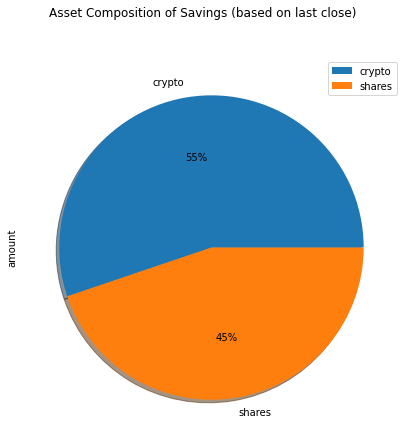

In [335]:
# Plot savings pie chart
# Experimenting a little ... if you place the commas
# at the start of the line you can comment out the
# line without having to rearrange things much.
df_savings.plot.pie(
    subplots=True
    ,shadow=True
    ,startangle=0
    ,autopct='%1.f%%'
    ,figsize=(10,7)
    ,title="Asset Composition of Savings (based on last close)\n"
)

In [339]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = list(df_savings.sum())

# Validate saving health
# Print the appropriate message
if total_savings[0] > emergency_fund:
    print(f"\nCongratulations! Your savings of ${total_savings[0]:0.02f} "
          f"are more than enough for an emergency fund!!!")
elif total_savings[0] == emergency_fund:
    print(f"\nCongratulations! You've reached your savings goal of "
          f"${total_savings[0]:0.02f} ... you must be proud!")
else:
    print(f"\nYou're nearly there, keep going!!!"
          f"  You have ${(emergency_fund-total_savings[0]):0.02f} to go, "
          f"given your current savings of ${total_savings[0]:0.02f}")


Congratulations! Your savings of $98792.70 are more than enough for an emergency fund!!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [211]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [225]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# I will get the last 2000 days' worth ... ~5 years is not enough for
# a decent Monte Carlo simulation, esp. id extrapolation is over 30 years.
# The data As in code above, to get last 1000 days (timeframe is 'day') start or end not req'd
#
# The investments_data DataFrame in part 1 has already been fetched for the data I need.
# To fetch the previous 1000 days, only an end date is required with limit=1000.
#
# Determine earliest date by checking the DataFrame
investments_data.head(1)

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2017-06-22 00:00:00-04:00  110.06  110.0947  109.95  110.05  1295361  242.97   

                                                             
                             high     low   close    volume  
time                                                         
2017-06-22 00:00:00-04:00  243.53  242.64  242.83  32991335

In [342]:
## AA DELETE ME
#new_end_date = pd.DataFrame((investments_data.reset_index()).iloc[0])
#new_end_date = new_end_date[0]["time"]
#new_end_date

# Set the date based on the earliest date returned less 1 day
# Overwrite the date set at the start of the MC simulation section.
end_date = pd.Timestamp('2017-06-21', tz=NYC).isoformat()

# Get the Data for the 1000 days before the latest 1000
df_stock_data_prev_1k = alpaca.get_barset(tickers, timeframe, end=end_date, limit=1000).df

# Join the last 1000 days and most recent 1000 days
df_stock_data = pd.concat([investments_data,df_stock_data_prev_1k], axis='rows', join='inner')

# Sort the new dataframe, ascending
df_stock_data.sort_index(inplace=True)

# Display sample data
df_stock_data.sample(5)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-02-16 00:00:00-05:00  116.22  116.2300  116.0200  116.030  5543350   
2015-09-02 00:00:00-04:00  108.92  109.0500  108.8100  108.900  3273302   
2019-10-16 00:00:00-04:00  112.68  112.7900  112.6200  112.720  2257665   
2014-07-07 00:00:00-04:00  108.68  108.7480  108.6214  108.655  1097756   
2018-11-06 00:00:00-05:00  104.09  104.1699  104.0635  104.100  2442244   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2021-02-16 00:00:00-05:00  393.96  394.17  391.53  392.34   43206214  
2015-09-02 00:00:00-04:00  194.65  195.46  192.42  195.46  120044919  
2019-10-16 00:00:00-04:00  298.37  299.16  297.92  298.41   40929771  
2014-07-07 00:00:00-04:00  197.82  197.98  197.22  197.54   47451681  
2018-11-06 00:00:00-05:00  273.32  275.30  273.25  275.12   49731823

In [284]:
# Set required sim constants
num_sims = 500
num_trdng_days = 252*30
asset_weights = [.4,.6]

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = asset_weights,
    num_simulation = num_sims,
    num_trading_days = num_trdng_days
)

In [285]:
# Printing the simulation input data
print(f"\nRunning a Monte Carlo Simulation of {num_sims} run(s) over {num_trdng_days/252:0.0f} year(s) given a 40/60 split of Bonds/Stocks respectively.\n")


Running a Monte Carlo Simulation of 500 run(s) over 30 year(s) given a 40/60 split of Bonds/Stocks respectively.



In [286]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996631,0.997305,0.997874,0.999384,0.992776,1.000192,1.008084,0.996073,1.005648,1.001471,...,0.997324,1.002945,1.002950,0.992231,0.991502,1.004087,1.000794,0.988633,1.002956,1.003604
2,0.986671,0.994770,0.990105,1.000661,0.991297,1.006513,1.010190,0.989735,0.988757,1.004533,...,0.997858,1.011427,1.009762,0.991550,0.998823,1.013348,0.994101,0.991197,0.994601,1.016355
3,0.990684,0.995173,0.991537,1.004603,0.996443,0.990740,1.019997,0.985606,0.983656,0.992505,...,0.996697,1.011759,1.006638,0.995833,0.999916,1.016918,0.993540,1.002149,0.998308,1.008759
4,0.994850,0.986469,0.990746,1.003445,1.001473,0.989097,1.011923,0.989511,0.994116,0.995502,...,0.995826,1.001953,1.006645,0.991729,0.990601,1.016922,0.982845,0.995499,0.994784,1.018226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.571363,8.123978,15.797514,16.609934,7.247071,2.564210,2.588596,9.849589,7.975488,13.118686,...,9.312332,7.420045,17.265780,8.378096,3.713019,7.330547,5.485236,18.250897,10.172788,21.425871
7557,16.617475,8.125859,15.769453,16.660998,7.236557,2.586684,2.600569,9.882495,7.965361,13.145917,...,9.380762,7.426461,17.272333,8.307737,3.701134,7.346723,5.505019,18.079651,10.160968,21.418188
7558,16.485594,8.082896,15.602811,16.920037,7.190170,2.591283,2.608249,9.851033,7.948426,13.331321,...,9.246003,7.354134,17.347512,8.321676,3.729944,7.369338,5.493555,18.038332,10.134916,21.516172
7559,16.275157,8.118957,15.443633,16.974384,7.175412,2.604567,2.587021,9.923077,7.932685,13.452692,...,9.298873,7.308650,17.610353,8.317644,3.737839,7.318316,5.549729,17.976755,10.174632,21.700676


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

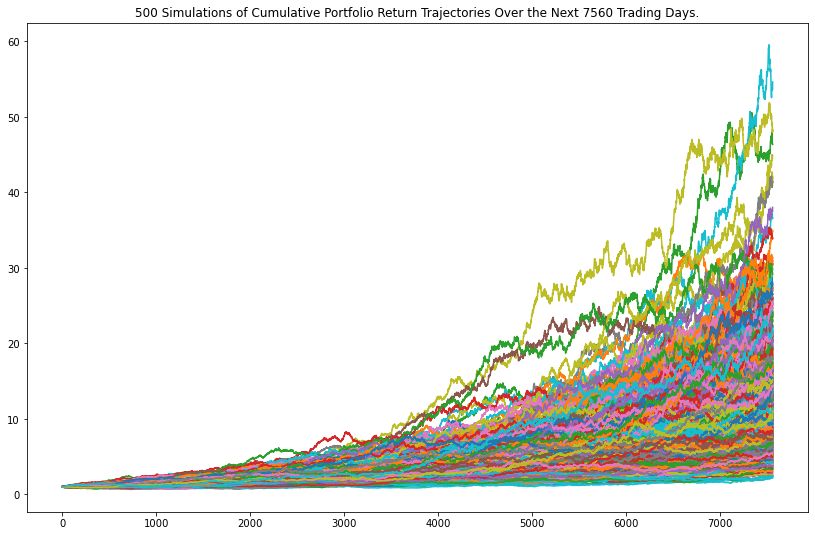

In [315]:
# Plot simulation outcomes
MC_thirty_yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

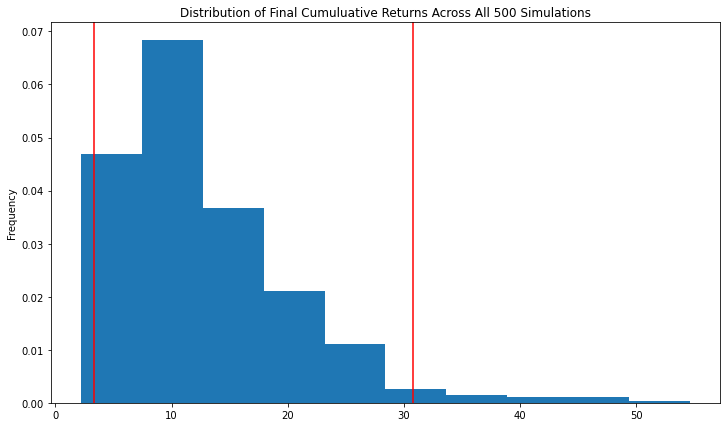

In [316]:
# Plot probability distribution and confidence intervals
MC_thirty_yrs.plot_distribution()

### Retirement Analysis

In [330]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_yr_stats = MC_thirty_yrs.summarize_cumulative_return()

# Print summary statistics
print("\nSummarised simulation results:")
print("------------------------------")
print(thirty_yr_stats)


Summarised simulation results:
------------------------------
count           500.000000
mean             12.754978
std               7.704697
min               2.208234
25%               7.544844
50%              10.693411
75%              16.239292
max              54.621019
95% CI Lower      3.318065
95% CI Upper     30.792063
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [312]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_yr_stats[8]*initial_investment)
ci_upper = round(thirty_yr_stats[9]*initial_investment)

# Print results
# Rounded up earlier ... makes for an easier reading experience
# corrected grammar ... from 'within in' to 'within'
print(f"\nThere is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" \nover the next 30 years, will end within the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio 
over the next 30 years, will end within the range of $66361 and $615841


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [313]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# No change ... code is identical
ci_lower = round(thirty_yr_stats[8]*initial_investment)
ci_upper = round(thirty_yr_stats[9]*initial_investment)

# Print results
# As above ... made the same changes.
print(f"\nThere is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" \nover the next 30 years will, end within the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $30000.0 in the portfolio 
over the next 30 years will, end within the range of $99542 and $923762


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")